# Project: Wrangling and Analyze Data

In [1]:
!pip install --upgrade tweepy==4.6.0

    100% |████████████████████████████████| 71kB 5.1MB/s ta 0:00:011
    100% |████████████████████████████████| 153kB 8.5MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 9.8MB/s eta 0:00:01    81% |██████████████████████████      | 51kB 22.7MB/s eta 0:00:01
  Found existing installation: oauthlib 2.0.6
    Uninstalling oauthlib-2.0.6:
      Successfully uninstalled oauthlib-2.0.6
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4
  Found existing installation: requests-oauthlib 0.8.0
    Uninstalling requests-oauthlib-0.8.0:
      Successfully uninstalled requests-oauthlib-0.8.0
  Found existing installation: tweepy 3.5.0
    Uninstalling tweepy-3.5.0:
      Successfully uninstalled tweepy-3.5.0


Importing Libraries

In [1]:
import tweepy

In [2]:
tweepy.__version__

'4.6.0'

In [3]:
import requests #download data
import numpy as np #array functions
import pandas as pd #data handling
import tweepy #twitter api
import json #handle json data
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
import re #text processing
import time

## Data Gathering

1. Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) and displaying the top 5 rows

**1. Loading the Dataset**

In [4]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


**2. Image Predictions**

First defining the url file and then using the request.get function, and write the content of the response to a new file. 

In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

#get response
response = requests.get(url)

#write return to an image
with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [6]:
twitter_predict =pd.read_csv("image_predictions.tsv", sep='\t')
twitter_predict.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


**3. Gathering additional data with the Twitter API**

In [7]:
# Setting up the Twitter API Tokens to be able to access Tweets
access_token = 
access_secret = 
consumer_key = 
consumer_secret = 
bearer_token = 
client_id=
client_secret=

In [8]:
# Defining my Client access
client = tweepy.Client(
    consumer_key=consumer_key,
    consumer_secret=consumer_secret,
    access_token=access_token,
    access_token_secret=access_secret,
    bearer_token=bearer_token,
    wait_on_rate_limit=True)

In [9]:
# Initialising Client and checking for correct user response and potential errors
client.get_me()

Response(data=<User id=1556583358372642816 name=Jitka_Richterova username=JitkaRichter>, includes={}, errors=[], meta={})

**Approach 1: with twitter API OUTH2 Enhanced developer access**

Getting all IDs in Twitter Dataset

In [10]:
twitter_ids = list(twitter_archive.tweet_id.unique())

# Tweet IDs for which to gather additional data via Twitter's API
twitter_ids = twitter_archive.tweet_id.values
len(twitter_ids)

2356

In [11]:
# Initialising Client and fetching one example tweet
import tweepy 
from tweepy import OAuthHandler
from timeit import default_timer as timer

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [12]:
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True)
api

In [16]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

In [16]:
#Printing 
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

The list of tweets 0
The list of tweets no found 2356


In [17]:
#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [18]:
#we write this list into a txt file:
with open('tweet_json1.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

**Approach 2: without twitter API OUTH2 Enhanced developer access**

In [13]:
# Initialising Client and fetching one example tweet
import tweepy 

client = tweepy.Client(
    consumer_key=consumer_key,
    consumer_secret=consumer_secret,
    access_token=access_token,
    access_token_secret=access_secret,
    bearer_token=bearer_token,
    wait_on_rate_limit=True)

tweet_ids=twitter_archive.tweet_id.values

#trying out code for one example tweet ID
example_tweet=tweet_ids[2]

print(f'Quering API for tweets: {example_tweet}\n') 

# retweet and favourites are in public_metrics
tweet_fields=['created_at', 'id', 'public_metrics','source', 'text']

# get information on individual tweet - example_tweet
temp=client.get_tweet(id=example_tweet, tweet_fields=tweet_fields)

# store information in .data
print(f'{temp.data}\n') 

#if temp.data.get('public_metrics'):
 #   print(f"{temp.data['public_metrics']=}") 


Quering API for tweets: 891815181378084864

This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB



In [14]:
# store data of example tweet 
tweet_data={}
if temp.data.get('public_metrics'):
    for key, value in temp.data['public_metrics'].items():
        #store the results
        tweet_data[key]=value
        
tweet_data

{'retweet_count': 3468,
 'reply_count': 110,
 'like_count': 21993,
 'quote_count': 145}

In [15]:
# Fetching all tweet data and storing them in tweet_info
info=['public_metrics']

tweet_info=[]

# Loop through each tweet_id
for ind, tweet_id in enumerate(twitter_archive.tweet_id):
    public_metrics={}
    # store tweet_id
    public_metrics['tweet_id']=tweet_id
    # Basic request per tweet_id
    temp_data = client.get_tweet(id=tweet_id, tweet_fields=info)
    if temp_data.data:
        if temp_data.data.get('public_metrics'):
            # Loop through the public metrics dictionary to get the keys/values that are embedded
            for key, value in temp_data.data['public_metrics'].items():
                public_metrics[key]=value
    tweet_info.append(public_metrics)

Rate limit exceeded. Sleeping for 865 seconds.
Rate limit exceeded. Sleeping for 876 seconds.
Rate limit exceeded. Sleeping for 878 seconds.
Rate limit exceeded. Sleeping for 875 seconds.
Rate limit exceeded. Sleeping for 878 seconds.
Rate limit exceeded. Sleeping for 878 seconds.
Rate limit exceeded. Sleeping for 879 seconds.


In [16]:
#displaying output of public_metrics
public_metrics

{'tweet_id': 666020888022790149,
 'retweet_count': 421,
 'reply_count': 20,
 'like_count': 2285,
 'quote_count': 30}

In [17]:
#displaying and checking output of tweet_info
tweet_info

[{'tweet_id': 892420643555336193,
  'retweet_count': 6981,
  'reply_count': 139,
  'like_count': 33728,
  'quote_count': 219},
 {'tweet_id': 892177421306343426,
  'retweet_count': 5282,
  'reply_count': 170,
  'like_count': 29261,
  'quote_count': 274},
 {'tweet_id': 891815181378084864,
  'retweet_count': 3468,
  'reply_count': 110,
  'like_count': 21993,
  'quote_count': 145},
 {'tweet_id': 891689557279858688,
  'retweet_count': 7203,
  'reply_count': 142,
  'like_count': 36838,
  'quote_count': 286},
 {'tweet_id': 891327558926688256,
  'retweet_count': 7725,
  'reply_count': 193,
  'like_count': 35223,
  'quote_count': 296},
 {'tweet_id': 891087950875897856,
  'retweet_count': 2591,
  'reply_count': 58,
  'like_count': 17763,
  'quote_count': 43},
 {'tweet_id': 890971913173991426,
  'retweet_count': 1650,
  'reply_count': 51,
  'like_count': 10343,
  'quote_count': 55},
 {'tweet_id': 890729181411237888,
  'retweet_count': 15702,
  'reply_count': 159,
  'like_count': 56716,
  'quote_c

In [18]:
#write this list into a txt file:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(tweet_info, indent=4))

In [19]:
# read json file
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
    print(data)

[{'tweet_id': 892420643555336193, 'retweet_count': 6981, 'reply_count': 139, 'like_count': 33728, 'quote_count': 219}, {'tweet_id': 892177421306343426, 'retweet_count': 5282, 'reply_count': 170, 'like_count': 29261, 'quote_count': 274}, {'tweet_id': 891815181378084864, 'retweet_count': 3468, 'reply_count': 110, 'like_count': 21993, 'quote_count': 145}, {'tweet_id': 891689557279858688, 'retweet_count': 7203, 'reply_count': 142, 'like_count': 36838, 'quote_count': 286}, {'tweet_id': 891327558926688256, 'retweet_count': 7725, 'reply_count': 193, 'like_count': 35223, 'quote_count': 296}, {'tweet_id': 891087950875897856, 'retweet_count': 2591, 'reply_count': 58, 'like_count': 17763, 'quote_count': 43}, {'tweet_id': 890971913173991426, 'retweet_count': 1650, 'reply_count': 51, 'like_count': 10343, 'quote_count': 55}, {'tweet_id': 890729181411237888, 'retweet_count': 15702, 'reply_count': 159, 'like_count': 56716, 'quote_count': 377}, {'tweet_id': 890609185150312448, 'retweet_count': 3606, 'r

In [20]:
# transforming twitter-info into a better looking dataframe called twitter_tweets
twitter_tweets = pd.DataFrame(tweet_info, columns = ['tweet_id', 'retweet_count','reply_count','like_count','quote_count'])
twitter_tweets

,tweet_id,retweet_count,reply_count,like_count,quote_count
0,892420643555336193,6981.0,139.0,33728.0,219.0
1,892177421306343426,5282.0,170.0,29261.0,274.0
2,891815181378084864,3468.0,110.0,21993.0,145.0
3,891689557279858688,7203.0,142.0,36838.0,286.0
4,891327558926688256,7725.0,193.0,35223.0,296.0
5,891087950875897856,2591.0,58.0,17763.0,43.0
6,890971913173991426,1650.0,51.0,10343.0,55.0
7,890729181411237888,15702.0,159.0,56716.0,377.0
8,890609185150312448,3606.0,92.0,24458.0,129.0
9,890240255349198849,6085.0,142.0,27882.0,352.0


## Assessing Data



### Visual Assessment

First let's display and check sample data for each data set to get a better idea of the data I am dealing with and do a first visual assessment of the tidiness and data quality. 

In [33]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
239,846874817362120707,NaN,NaN,2017-03-29 00:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Tuck. As you can see, he's rather h*ck...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/846874817...,13,10,Tuck,None,None,None,None
870,761672994376806400,NaN,NaN,2016-08-05 21:19:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,None,None,None
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694352839...,10,10,Oliviér,None,None,None,None
629,794355576146903043,NaN,NaN,2016-11-04 01:48:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Butter. She can have wh...,7.887659e+17,4.196984e+09,2016-10-19 15:37:03 +0000,https://twitter.com/dog_rates/status/788765914...,12,10,Butter,None,None,None,None
1040,744223424764059648,NaN,NaN,2016-06-18 17:41:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a pupper and I'd pet it so we...,NaN,NaN,NaN,https://twitter.com/strange_animals/status/672...,12,10,actually,None,None,pupper,None


In [34]:
twitter_predict.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
758,688789766343622656,https://pbs.twimg.com/media/CY8SocAWsAARuyh.jpg,1,American_Staffordshire_terrier,0.599660,True,Staffordshire_bullterrier,0.380976,True,bull_mastiff,0.003889,True
1366,761672994376806400,https://pbs.twimg.com/ext_tw_video_thumb/76167...,1,gondola,0.318851,False,sea_lion,0.306525,False,pool_table,0.111565,False
840,694669722378485760,https://pbs.twimg.com/media/CaP2bS8WYAAsMdx.jpg,2,beaver,0.457094,False,mongoose,0.228298,False,marmot,0.148309,False
1891,849051919805034497,https://pbs.twimg.com/media/C8hwNxbXYAAwyVG.jpg,1,fountain,0.997509,False,American_black_bear,0.001413,False,sundial,0.000681,False
1540,790987426131050500,https://pbs.twimg.com/media/Cvom3ZJXEAE29TD.jpg,1,cocker_spaniel,0.349195,True,flat-coated_retriever,0.309535,True,Newfoundland,0.104768,True


In [35]:
twitter_tweets.sample(5)

,tweet_id,retweet_count,reply_count,like_count,quote_count
1543,689557536375177216,404.0,8.0,1896.0,0.0
1469,694183373896572928,842.0,16.0,2707.0,0.0
2240,667924896115245057,95.0,2.0,264.0,0.0
2088,670792680469889025,237.0,5.0,732.0,0.0
2016,672169685991993344,319.0,9.0,909.0,0.0


### Programmatic assessment

Now let's do some programmatic data tidiness and quality assessmet once again for each dataset.  I will be marking the observations down directly in the Data Quality issues list in the section below

In [36]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [37]:
twitter_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [38]:
twitter_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 5 columns):
tweet_id         2356 non-null int64
retweet_count    2327 non-null float64
reply_count      2327 non-null float64
like_count       2327 non-null float64
quote_count      2327 non-null float64
dtypes: float64(4), int64(1)
memory usage: 92.1 KB


In [39]:
list(twitter_predict)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [40]:
list(twitter_archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [41]:
list(twitter_tweets)

['tweet_id', 'retweet_count', 'reply_count', 'like_count', 'quote_count']

In [42]:
all_columns = pd.Series(list(twitter_archive) + list(twitter_predict) + list(twitter_tweets))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [43]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [44]:
twitter_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [45]:
twitter_tweets.describe()

,tweet_id,retweet_count,reply_count,like_count,quote_count
count,2.356000e+03,2327.000000,2327.000000,2327.000000,2327.000000
mean,7.427716e+17,2463.055006,42.177052,7033.706919,71.345080
std,6.856705e+16,4171.277101,70.763527,10928.769866,220.254232
min,6.660209e+17,1.000000,0.000000,0.000000,0.000000
25%,6.783989e+17,493.500000,9.000000,1221.500000,0.000000
50%,7.196279e+17,1148.000000,23.000000,3042.000000,1.000000
75%,7.993373e+17,2850.500000,48.000000,8572.500000,69.500000
max,8.924206e+17,70483.000000,1120.000000,144406.000000,4347.000000


In [46]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Lola           10
Penny          10
Tucker         10
Bo              9
Winston         9
the             8
Sadie           8
Toby            7
Bailey          7
Buddy           7
an              7
Daisy           7
Dave            6
Bella           6
Rusty           6
Koda            6
Scout           6
Milo            6
Jack            6
Stanley         6
Oscar           6
Jax             6
Leo             6
Larry           5
             ... 
Carper          1
Alfy            1
Gerbald         1
Boots           1
Stefan          1
Bruiser         1
Benny           1
Brian           1
Arya            1
Robin           1
Ace             1
Meera           1
Jaycob          1
Hubertson       1
Jockson         1
Chaz            1
Gin             1
Yoda            1
Harlso          1
Storkson        1
Jo              1
Ralphson        1
Malikai         1
Pluto           1
Jessifer  

In [47]:
twitter_predict.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
beagle                        18
teddy                         18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [48]:
twitter_predict[twitter_predict.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [49]:
list(twitter_archive.text)[:5]

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f']

In [50]:
twitter_archive.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

In [51]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [52]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### Quality issues
1. twitter_archive has some duplicate tweets or retweets that do not necessary contain dog ratings - clean the retweets

2. twitter_archive text column contains hyperlink which we do not need - extract and remove

3. twitter_archive timestamp is data type object and tweet_id is integer - change data type

4. twitter_predict shows several predictions but only one would be needed, some predictions are not dogs - what is going on there, maybe tweets that do not rate dogs? CHoose best prediction only.

5. twitter_archive has unnecessary columns like in_reply_to_status_idm in_reply_to_user_id, retweeted_status_idm source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp - remove columns

6. twitter_archive - some rows in column name contain 'None' - missing data. some rows in column name contains non-names values with lower case - like a or quite - clean those columns 

7. Remove the "None" out of the doggo, floofer, pupper and puppo column and merge them into one column

8. twitter_archive rating_numerator has values ranging from 0 to 1779 and denominator 0-170

### Tidiness issues
1. dog breeds have some upper and some lower cases - change all to lower case only

2. merge the three datasets together and clean the unnecessary columns, once again check for correct data types, unnecessary data etc.

## Cleaning Data

First let's make a copy of the original data before cleaning. Then I will do individual cleaning steps and at the end merge the data into one clean master dataset

In [22]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
twitter_predict_clean = twitter_predict.copy()
twitter_tweets_clean = twitter_tweets.copy()

### Issue #1:

#### Define: twitter_archive has some duplicate tweets
Remove unnecessary retweets using boolean masking to select only entries that have null values (ie. that are "True") for retweeted_status_id

#### Code

In [26]:
# Total number of tweets including retweets
twitter_archive_clean.shape[0]

2356

In [27]:
# Number of retweets
twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()== False].count()[0]

181

In [29]:
# remove duplicates
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()== True]

#### Test

In [30]:
# Total number of tweets (should be  2175 [2356 - 181])
twitter_archive_clean.shape[0]

2175

### Issue #2:

#### Define - twitter_archive text column contains hyperlink which we do not need 
Remove hyperlink data from text column in the twitter_archive dataframe

#### Code

In [31]:
# Check if 'text' columns contain URLs (should be "True")
string = twitter_archive_clean.text.str.contains(r'\shttps.+$').describe()[2]
print("Does the `text` column contain URLs that should be removed?: {}".format(string))

Does the `text` column contain URLs that should be removed?: True


In [32]:
# Precleaning check
list(twitter_archive_clean.text)[:5]

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f']

In [33]:
# Remove URLs
twitter_archive_clean["text"] = twitter_archive_clean.text.str.split(r'\shttps.+$', expand=True)

#### Test

In [34]:
# Check if 'text' columns contain URLs (should be "True")
string = twitter_archive_clean.text.str.contains(r'\shttps.+$').describe()[2]
print("Does the `text` column contain URLs that should be removed?: {}".format(string))

Does the `text` column contain URLs that should be removed?: False


In [35]:
# Checking the text
list(twitter_archive_clean.text)[:5]

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek']

In [36]:
# Remove URLs
twitter_archive_clean["text"] = twitter_archive_clean.text.str.split(r'\shttps.+$', expand=True)

#### Test

In [37]:
# Check if 'text' columns contain URLs (should be "False")
string = twitter_archive_clean.text.str.contains(r'\shttps.+$').describe()[2]
print("Does the `text` column contain URLs that should be removed?: {}".format(string))

Does the `text` column contain URLs that should be removed?: False


In [38]:
# Postcleaning check
list(twitter_archive_clean.text)[:5]

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek']

### Issue #3:

#### Define - twitter_archive timestamp is data type object and tweet_id is integer
Change dtype of timestamp column to datatime using to_datetime

#### Code

In [39]:
# Precleaning check
twitter_archive_clean["timestamp"].dtypes

dtype('O')

In [40]:
twitter_archive_clean["tweet_id"].dtypes
twitter_predict_clean["tweet_id"].dtypes
twitter_tweets_clean["tweet_id"].dtypes

dtype('int64')

In [41]:
# Change dtype of `timestamp` column to `datatime` using `to_datetime`
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [47]:
# Change tweet_id from integer to string
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')
twitter_predict_clean['tweet_id'] = twitter_predict_clean['tweet_id'].astype('str')
twitter_tweets_clean['tweet_id'] = twitter_tweets_clean['tweet_id'].astype('str')

#### Test

In [43]:
# check code worked
twitter_archive_clean["timestamp"].dtypes

dtype('<M8[ns]')

In [44]:
# check code worked
twitter_archive_clean["tweet_id"].dtypes

dtype('O')

In [48]:
# check code worked
twitter_predict_clean["tweet_id"].dtypes

dtype('O')

In [49]:
twitter_tweets_clean["tweet_id"].dtypes

dtype('O')

### Issue #4:

#### Define twitter_predict shows several predictions but only one would be needed
I reviewed the data and decided to only keep the first prediction as that is usually the best one

#### Code

In [50]:
#  Precleaning check
list(twitter_predict_clean.columns)
# 12 columns, columns of pedictions are 4-12

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [51]:
twitter_predict_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [52]:
#extract the most likely prediction which is a dog
def get_attr(x):
    """
    INPUT: 
        Columns in this order: Check1, Result1, Check2, Result2, Result3
    OUTPUT:
        Results based on the check in this columns
    """
    if x[0] == True:
        return x[1]
    elif x[2] == True:
        return x[3]
    else:
        return x[4]
    
twitter_predict_clean["breed"] = twitter_predict_clean[["p1_dog", "p1", "p2_dog", "p2", "p3"]].apply(get_attr, axis = 1)
twitter_predict_clean["conf"] = twitter_predict_clean[["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3_conf"]].apply(get_attr, axis = 1)

In [53]:
# visual check that breads column only displays dog breeds
twitter_predict_clean.iloc[:, 12:]

,breed,conf
0,Welsh_springer_spaniel,0.465074
1,redbone,0.506826
2,German_shepherd,0.596461
3,Rhodesian_ridgeback,0.408143
4,miniature_pinscher,0.560311
5,Bernese_mountain_dog,0.651137
6,terrapin,0.017885
7,chow,0.692517
8,golden_retriever,0.007959
9,miniature_poodle,0.201493


In [54]:
twitter_predict_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826


In [55]:
#drop the reduced columns
twitter_predict_clean.drop(twitter_predict_clean.columns[3:12], inplace = True, axis = 1)

#### Test

In [56]:
# Postcleaning check
list(twitter_predict_clean.columns)

['tweet_id', 'jpg_url', 'img_num', 'breed', 'conf']

In [57]:
twitter_predict_clean.head()

,tweet_id,jpg_url,img_num,breed,conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


### Issue #5:

#### Define twitter_archive has unnecessary columns like in_reply_to_status_idm in_reply_to_user_id, retweeted_status_idm source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
Drop the not needed columns

#### Code

In [58]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [59]:
# Drop the not needed columns
unnecessary_columns = ["in_reply_to_status_id", 
                       "in_reply_to_user_id", 
                       "retweeted_status_id", 
                       "source", 
                       "retweeted_status_id", 
                       "retweeted_status_user_id",
                       "retweeted_status_timestamp"]

twitter_archive_clean = twitter_archive_clean.drop(unnecessary_columns, axis=1) 

#### Test

In [60]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue #6:

#### Define twitter_archive - some rows in column name contain 'None' - missing data
fix the names in the column name to contain only valid data

#### Code

In [61]:
# this one is now easier to do on the final cleaned data than if we tried it in the beginning
twitter_archive_clean.name.value_counts().nlargest(50)

None        680
a            55
Charlie      11
Lucy         11
Oliver       10
Cooper       10
Tucker        9
Penny         9
Winston       8
the           8
Sadie         8
Lola          8
Toby          7
Daisy         7
Bella         6
Oscar         6
Stanley       6
Bailey        6
Koda          6
Bo            6
an            6
Jax           6
Scout         5
Milo          5
Buddy         5
Leo           5
Rusty         5
Dave          5
Chester       5
Bentley       5
Louis         5
Gus           4
Phil          4
Boomer        4
Alfie         4
Finn          4
Gary          4
Chip          4
Brody         4
Jeffrey       4
Jerry         4
Scooter       4
George        4
Duke          4
Clarence      4
Sammy         4
Oakley        4
Reggie        4
Larry         4
Archie        4
Name: name, dtype: int64

In [62]:
# Get count of misentered entries - starting small letters
string = twitter_archive_clean.name[twitter_archive_clean.name.str.match(r'(^[a-z])')].count()
print("There are {} invalid names in the `name` column".format(string))

There are 104 invalid names in the `name` column


In [63]:
# Isolate entries of "None" in the `name` column and subset the `name` and `text` columns for easier viewing
none_names = twitter_archive_clean.query('name == "None"')[["name","text"]]
none_names.head()

,name,text
5,None,Here we have a majestic great white breaching ...
7,None,When you watch your owner call another dog a g...
12,None,Here's a puppo that seems to be on the fence a...
24,None,You may not have known you needed to see this ...
25,None,This... is a Jubilant Antarctic House Bear. We...


In [64]:
string4 = none_names.count()[0]
print("There are {} entries with 'None' entered as the dog's name.".format(string4))

There are 680 entries with 'None' entered as the dog's name.


In [65]:
# first, let's change "None" to real None
twitter_archive_clean.name.replace('None', inplace=True)

In [66]:
# it looks like all names starting with lowercase letter seem not to be real names - let's check more in detail
empty=twitter_archive_clean.loc[twitter_archive_clean['name'].str.islower()][['tweet_id','text','name']]

In [67]:
from IPython.display import display
display(empty.style.set_properties(**{
        'width': '1000px',
        'max-width': '1000px'
    }))

,tweet_id,text,name
22,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy),such
56,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af (IG: puffie_the_chow),a
169,859196978902773760,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10,quite
170,859074603037188101,Here we have an exotic dog. Good at ukulele. Fashionable af. Has two more arms if needed. Is blue. Knows what 'ohana means. 13/10 would pet,quite
172,858843525470990336,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge,quite
193,855459453768019968,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective",quite
335,832645525019123713,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10,not
369,828650029636317184,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace",one
542,806219024703037440,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10,incredibly
649,792913359805018113,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest,a


**Notes:**
- most of these texts do not actually contain any names - so should be changed to None

- some have name but not extracted correctly 

- some were non-dog tweets -  these should be removed completely

In [68]:
# First Removing tweets that do not rate dogs and non-dog tweets or unclear tweets
twitter_archive_clean.drop([169,193,335,369,542,801,819,988,1002,
                            1004,1017,1019,1018,1025,1031,1071,1097,
                            1098, 1121,1193,1206,1207,1259,1260, 1341,
                           1352,1353,1361,1362,1385,1435,1527,1693,1737,
                           1854,1877,1942,1943,], axis=0, inplace=True)

In [69]:
# now use a function to look for names with None and replace with actual name, the actual name will be placed in column dog_name
def dog_name_finder(df):
    """ Use a regex to extract the name of the dog and place the dog name in the 'name' column.
    
    Keyword arguments:
    df -- String in 'text' column must contain the one of the following patterns to be matched:
    - "named *dog name*"
    - "name is *dog name*" 
    
    """
    x = df.text.str.extract(r'(?:(?:name\sis\s)|(?:named\s))([a-zA-Z]+)')
    df['dog_name'] = x[0]
    df = df[x[0].isnull() == False]
    return df

none_names = dog_name_finder(none_names)
none_names

,name,text,dog_name
35,None,I have a new hero and his name is Howard. 14/10,Howard
168,None,Sorry for the lack of posts today. I came home...,Zoey
843,None,His name is Charley and he already has a new s...,Charley
1678,None,We normally don't rate bears but this one seem...,Thea
1734,None,This pup's name is Sabertooth (parents must be...,Sabertooth
2166,None,Here we have a Gingivitis Pumpernickel named Z...,Zeus
2227,None,Here we have an Azerbaijani Buttermilk named G...,Guss
2267,None,Another topnotch dog. His name is Big Jumpy Ra...,Big
2269,None,This a Norwegian Pewterschmidt named Tickles. ...,Tickles


In [70]:
# Replace 'None' entries in `name` column with entries from `dog_name`
def dog_name_changer(df):
    """Replace values of `name` with those from `dog_name`."""
    df["name"] = df['dog_name'].values
    df = df.drop(columns="dog_name")
    return df

none_names = dog_name_changer(none_names)
none_names

,name,text
35,Howard,I have a new hero and his name is Howard. 14/10
168,Zoey,Sorry for the lack of posts today. I came home...
843,Charley,His name is Charley and he already has a new s...
1678,Thea,We normally don't rate bears but this one seem...
1734,Sabertooth,This pup's name is Sabertooth (parents must be...
2166,Zeus,Here we have a Gingivitis Pumpernickel named Z...
2227,Guss,Here we have an Azerbaijani Buttermilk named G...
2267,Big,Another topnotch dog. His name is Big Jumpy Ra...
2269,Tickles,This a Norwegian Pewterschmidt named Tickles. ...


In [71]:
# Manually replace index 2267 name value to "Big Jumpy Rat"
none_names["name"].loc[[2267]] = "Big Jumpy Rat"
none_names

,name,text
35,Howard,I have a new hero and his name is Howard. 14/10
168,Zoey,Sorry for the lack of posts today. I came home...
843,Charley,His name is Charley and he already has a new s...
1678,Thea,We normally don't rate bears but this one seem...
1734,Sabertooth,This pup's name is Sabertooth (parents must be...
2166,Zeus,Here we have a Gingivitis Pumpernickel named Z...
2227,Guss,Here we have an Azerbaijani Buttermilk named G...
2267,Big Jumpy Rat,Another topnotch dog. His name is Big Jumpy Ra...
2269,Tickles,This a Norwegian Pewterschmidt named Tickles. ...


#### Test

In [72]:
# Reconfirm current state of `df_archive_clean`
txt = "This table currently has {} 'none' entries, {} rows, and {} columns."
string1 = twitter_archive_clean.query('name == "None"').count()[0]
string2 = twitter_archive_clean.shape
print(txt.format(string1, string2[0], string2[1]))

This table currently has 0 'none' entries, 2137 rows, and 11 columns.


### Issue #7:

#### Define  - the doggo,  floofer, pupper, and puppo have each a separate column, would be better to merge them into one 
remove the none and merge the dog types in one column
further data source:

https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python
http://queirozf.com/entries/visualization-options-for-jupyter-notebooks

#### Code & Test #7

In [73]:
#replace "None" with "" in each column
for x in ["doggo", "floofer", "pupper", "puppo"]:
    twitter_archive_clean[x].replace("None", "", inplace = True)

#concat the columns together
twitter_archive_clean['dog_type'] = twitter_archive_clean['doggo'].map(str) + twitter_archive_clean[
    'floofer'].map(str) + twitter_archive_clean['pupper'].map(str) + twitter_archive_clean['puppo'].map(str)

In [74]:
# display the current values and their count in the new consolidated column dog_type
twitter_archive_clean.dog_type.value_counts()

                1793
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_type, dtype: int64

In [75]:
#replace the leftover "" with np.nan
twitter_archive_clean["dog_type"].replace("", np.nan, inplace = True)

In [76]:
# show updated values
twitter_archive_clean.dog_type.value_counts() 

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggofloofer      1
doggopuppo        1
Name: dog_type, dtype: int64

In [77]:
# some values are two types combined together like doggopupper - lets display those
twitter_archive_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)')[
    twitter_archive_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)') > 1]

191     2
531     3
565     2
575     2
631     2
705     2
889     2
956     2
1063    2
1113    2
1304    2
1340    2
1367    2
1653    2
1788    2
1828    2
1907    3
Name: text, dtype: int64

In [78]:
# extract those cases with multiple dog_types 
twitter_archive_clean["dog_type_re"] = twitter_archive_clean.text.str.extract(
    r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)', expand = True)

In [79]:
#show the full text
pd.set_option('display.max_colwidth', -1)

#find the differences of the extract
twitter_archive_clean[["text","dog_type", "dog_type_re"]].dropna(subset = ["dog_type_re"]).query("dog_type != dog_type_re")

,text,dog_type,dog_type_re
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for,doggopuppo,puppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs",doggofloofer,doggo
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time,doggopupper,pupper
565,"Like doggo, like pupper version 2. Both 11/10",doggopupper,doggo
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine,doggopupper,doggo
705,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously,doggopupper,doggo
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time",doggopupper,doggo
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho,doggopupper,doggo
1063,This is just downright precious af. 12/10 for both pupper and doggo,doggopupper,pupper
1113,"Like father (doggo), like son (pupper). Both 12/10",doggopupper,doggo


In [121]:
# re-assigning the correct dog type to those above cases after reading through the descriptions
#191 puppo
#200 floofer
#531 two dogs
#F65 two dogs
#575 pupper
#705 doggo
#778 two dogs
#822 two dogs
#889 two dogs
#956 not classified by author
#1063 two dogs
#1113 two dogs

twitter_archive_clean.loc[191, "dog_type"] = "puppo"
twitter_archive_clean.loc[200, "dog_type"] = "floofer"
twitter_archive_clean.loc[531, "dog_type"] = np.nan
twitter_archive_clean.loc[565, "dog_type"] = "doggo"
twitter_archive_clean.loc[575, "dog_type"] = "pupper"
twitter_archive_clean.loc[705, "dog_type"] = "doggo"
twitter_archive_clean.loc[778, "dog_type"] = np.nan
twitter_archive_clean.loc[822, "dog_type"] = np.nan
twitter_archive_clean.loc[889, "dog_type"] = np.nan
twitter_archive_clean.loc[956, "dog_type"] = np.nan
twitter_archive_clean.loc[1063, "dog_type"] = np.nan
twitter_archive_clean.loc[1113, "dog_type"] = np.nan
twitter_archive_clean.loc[460, "dog_type"] = np.nan
twitter_archive_clean.loc[733, "dog_type"] = np.nan

In [81]:
#find the differences of the extract - worked
twitter_archive_clean[["text","dog_type", "dog_type_re"]].dropna(subset = ["dog_type_re"]).query("dog_type != dog_type_re")

,text,dog_type,dog_type_re
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs",floofer,doggo
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time,NaN,pupper
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine,pupper,doggo
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time",NaN,doggo
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho,NaN,doggo
1063,This is just downright precious af. 12/10 for both pupper and doggo,NaN,pupper
1113,"Like father (doggo), like son (pupper). Both 12/10",NaN,doggo


In [82]:
#drop the columns out
twitter_archive_clean.drop(["doggo", "floofer", "pupper", "puppo", "dog_type_re"], inplace = True, axis = 1)

#### Test #7

In [83]:
#ckeck again for two dog types in one row - looks like it worked
twitter_archive_clean[["text", "dog_type"]].loc[
    twitter_archive_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)')[
        twitter_archive_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)') > 1].index]

,text,dog_type
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for,puppo
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time,NaN
565,"Like doggo, like pupper version 2. Both 11/10",doggo
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine,pupper
631,This is Laika. She was a space pupper. The first space pupper actually. Orbited earth like a h*ckin boss. 14/10 hero af,pupper
705,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously,doggo
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time",NaN
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho,NaN
1063,This is just downright precious af. 12/10 for both pupper and doggo,NaN
1113,"Like father (doggo), like son (pupper). Both 12/10",NaN


### Issue #8:

#### Define - twitter_archive rating_numerator has values ranging from 0 to 1779 and denominator 0-170
 For entries with irregular denominators (i.e. not 10), normalize both the numerator and denominator to a standard denominator of 10 \ b. For entries with irregular numerators (i.e. outliers outside of the 95th percentile but have denominators of 10), either normalize the entries using the overall median or fix an error
 
Clean the entries with strange denominators larger than 10 and normalize both numerator and denominator to a common standard of division of 10. 
 Fix errors or normalise for incorrect data and outliers. 

#### Code

In [84]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)

In [85]:
twitter_archive_clean['rating_numerator'].dtype

dtype('float64')

In [86]:
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)
twitter_archive_clean['rating_denominator'].dtype

dtype('float64')

In [87]:
txt = "{} entries have a denominator of 10 so {} entries have irregular denominators."
string1 = twitter_archive_clean.query('rating_denominator==10').count()[0]
string2 = twitter_archive_clean.query('rating_denominator!=10').count()[0]
print(txt.format(string1, string2))

2115 entries have a denominator of 10 so 22 entries have irregular denominators.


In [88]:
twitter_archive_clean.rating_denominator.value_counts()

10.0     2115
50.0     3   
11.0     2   
20.0     2   
80.0     2   
110.0    1   
0.0      1   
15.0     1   
7.0      1   
150.0    1   
16.0     1   
120.0    1   
2.0      1   
170.0    1   
70.0     1   
130.0    1   
90.0     1   
40.0     1   
Name: rating_denominator, dtype: int64

In [89]:
# Isolate entries with irregular denominators and subset only the relevant columns for easier viewing
irr_denominator = twitter_archive_clean.query('rating_denominator!=10')[["name","text","rating_numerator", "rating_denominator"]]
irr_denominator

,name,text,rating_numerator,rating_denominator
313,Lola,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,0.0
342,Smiley,@docmisterio account started on 11/15/15,11.0,15.0
433,Sunny,The floofs have been released I repeat the floofs have been released. 84/70,84.0,70.0
516,Sam,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:,24.0,7.0
902,Brandonald,Why does this never happen at my front door... 165/150,165.0,150.0
1068,Baloo,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP",9.0,11.0
1120,this,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once,204.0,170.0
1165,Jangle,Happy 4/20 from the squad! 13/10 for all,4.0,20.0
1202,Bluebert,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,50.0,50.0
1228,Doug,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody,99.0,90.0


In [90]:
# Correct the data above
twitter_archive_clean.loc[313, "rating_numerator"] = 13
twitter_archive_clean.loc[313, "rating_denominator"] = 10
twitter_archive_clean.loc[342, "rating_numerator"] = np.nan
twitter_archive_clean.loc[342, "rating_denominator"] = np.nan
twitter_archive_clean.loc[433, "rating_numerator"] = np.nan
twitter_archive_clean.loc[433, "rating_denominator"] = np.nan
twitter_archive_clean.loc[516, "rating_numerator"] = np.nan
twitter_archive_clean.loc[516, "rating_denominator"] = np.nan
twitter_archive_clean.loc[902, "rating_numerator"] = np.nan
twitter_archive_clean.loc[902, "rating_denominator"] = np.nan
twitter_archive_clean.loc[1068, "rating_numerator"] = 14
twitter_archive_clean.loc[1068, "rating_denominator"] = 10
twitter_archive_clean.loc[1120, "rating_numerator"] = 12
twitter_archive_clean.loc[1120, "rating_denominator"] = 10
twitter_archive_clean.loc[1165, "rating_numerator"] = 13
twitter_archive_clean.loc[1165, "rating_denominator"] = 10
twitter_archive_clean.loc[1202, "rating_numerator"] = 11
twitter_archive_clean.loc[1202, "rating_denominator"] = 10
twitter_archive_clean.loc[1228, "rating_numerator"] = 11
twitter_archive_clean.loc[1228, "rating_denominator"] = 10
twitter_archive_clean.loc[1254, "rating_numerator"] = 10
twitter_archive_clean.loc[1254, "rating_denominator"] = 10
twitter_archive_clean.loc[1274, "rating_numerator"] = np.nan
twitter_archive_clean.loc[1274, "rating_denominator"] = np.nan
twitter_archive_clean.loc[1351, "rating_numerator"] = 12
twitter_archive_clean.loc[1351, "rating_denominator"] = 10
twitter_archive_clean.loc[1433, "rating_numerator"] = np.nan
twitter_archive_clean.loc[1433, "rating_denominator"] = np.nan
twitter_archive_clean.loc[1598, "rating_numerator"] = 2
twitter_archive_clean.loc[1598, "rating_denominator"] = 10
twitter_archive_clean.loc[1634, "rating_numerator"] = 11
twitter_archive_clean.loc[1634, "rating_denominator"] = 10
twitter_archive_clean.loc[1635, "rating_numerator"] = 11
twitter_archive_clean.loc[1635, "rating_denominator"] = 10
twitter_archive_clean.loc[1662, "rating_numerator"] = 10
twitter_archive_clean.loc[1662, "rating_denominator"] = 10
twitter_archive_clean.loc[1663, "rating_numerator"] = 12.5
twitter_archive_clean.loc[1663, "rating_denominator"] = 10
twitter_archive_clean.loc[1779, "rating_numerator"] = 12
twitter_archive_clean.loc[1779, "rating_denominator"] = 10
twitter_archive_clean.loc[1843, "rating_numerator"] = 11
twitter_archive_clean.loc[1843, "rating_denominator"] = 10
twitter_archive_clean.loc[2335, "rating_numerator"] = 9
twitter_archive_clean.loc[2335, "rating_denominator"] = 10
twitter_archive_clean.loc[2335, "rating_numerator"] = 9
twitter_archive_clean.loc[2335, "rating_denominator"] = 10

In [91]:
twitter_archive_clean=twitter_archive_clean.drop(index=778)

In [92]:
twitter_archive_clean=twitter_archive_clean.drop(index=822)

In [93]:
# Create a new column called rating, and calulate the value with new, standardized ratings
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

In [94]:
#pre check of current results
twitter_archive_clean.loc[40]

tweet_id              884562892145688576                                                
timestamp             2017-07-11 00:00:02                                               
text                  This is Kevin. He's just so happy. 13/10 what is your secret Kevin
expanded_urls         https://twitter.com/dog_rates/status/884562892145688576/photo/1   
rating_numerator      13                                                                
rating_denominator    10                                                                
name                  Kevin                                                             
dog_type              NaN                                                               
rating                1.3                                                               
Name: 40, dtype: object

#### Test

In [95]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2137 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2137 non-null object
timestamp             2137 non-null datetime64[ns]
text                  2137 non-null object
expanded_urls         2079 non-null object
rating_numerator      2131 non-null float64
rating_denominator    2131 non-null float64
name                  2137 non-null object
dog_type              339 non-null object
rating                2131 non-null float64
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 247.0+ KB


In [96]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,rating
2042,671538301157904385,2015-12-01 03:56:22,This is Baxter. He's very calm. Hasn't eaten in weeks tho. Not good at fetch. Never blinks. 8/10 would still pet,https://twitter.com/dog_rates/status/671538301157904385/photo/1,8.0,10.0,Baxter,NaN,0.8
1961,673359818736984064,2015-12-06 04:34:25,This is Steve. He was just relaxing in hot tub when he was intruded upon. 8/10 poor little pup,https://twitter.com/dog_rates/status/673359818736984064/photo/1,8.0,10.0,Steve,NaN,0.8
766,777684233540206592,2016-09-19 01:42:24,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing",https://twitter.com/dog_rates/status/777684233540206592/photo/1,12.0,10.0,Wesley,NaN,1.2
1067,740676976021798912,2016-06-08 22:48:46,"Meet Baloo. He's expecting a fast ground ball, hence the wide stance. Prepared af. 11/10 nothing runs like a pupper",https://twitter.com/dog_rates/status/740676976021798912/photo/1,11.0,10.0,Baloo,pupper,1.1
1761,678675843183484930,2015-12-20 20:38:24,Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet,https://twitter.com/dog_rates/status/678675843183484930/photo/1,2.0,10.0,Tango,NaN,0.2


In [97]:
# Checking results - looks good
twitter_archive_clean.loc[30]

tweet_id              886267009285017600                                                                                       
timestamp             2017-07-15 16:51:35                                                                                      
text                  @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
expanded_urls         NaN                                                                                                      
rating_numerator      12                                                                                                       
rating_denominator    10                                                                                                       
name                  Roscoe                                                                                                   
dog_type              NaN                                                                               

In [98]:
twitter_archive_clean.rating_denominator.value_counts()

10.0    2131
Name: rating_denominator, dtype: int64

### Tidiness #1: 

#### Define #1: dog breeds start sometimes with capital letter and sometimes with lower letter
solution: convert all to lower case only

additional source: https://stackoverflow.com/questions/22245171/how-to-lowercase-a-python-dataframe-string-column-if-it-has-missing-values

https://thispointer.com/convert-column-values-to-lowercase-in-pandas-dataframe/

#### Code #1: 

In [99]:
# clean the breed column for tidiness replace "_" with " "
twitter_predict_clean.breed = twitter_predict_clean.breed.str.replace("_", " ")

In [100]:
#lower the strings
twitter_predict_clean.breed = twitter_predict_clean.breed.str.lower()

In [101]:
#reset index to match with the real amount of rows
twitter_predict_clean.reset_index(drop = True, inplace = True)

#### Test #1: 

In [102]:
twitter_predict_clean.head()

,tweet_id,jpg_url,img_num,breed,conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311


### Tidiness #2: 

#### Define #2: merge the three datasets to one and do final cleaning - check for duplicated columns, remove them, check correct data types

#### Code #2

In [124]:
#first do outer join to not lose any data
twitter_master = pd.merge(twitter_archive_clean, twitter_tweets_clean, on = "tweet_id", how = "inner")

In [125]:
# second join
twitter_master = pd.merge(twitter_master, twitter_predict_clean, on = "tweet_id", how = "inner")

In [126]:
# display info
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 0 to 1957
Data columns (total 17 columns):
tweet_id              1958 non-null object
timestamp             1958 non-null datetime64[ns]
text                  1958 non-null object
expanded_urls         1958 non-null object
rating_numerator      1953 non-null float64
rating_denominator    1953 non-null float64
name                  1958 non-null object
dog_type              300 non-null object
rating                1953 non-null float64
retweet_count         1950 non-null float64
reply_count           1950 non-null float64
like_count            1950 non-null float64
quote_count           1950 non-null float64
jpg_url               1958 non-null object
img_num               1958 non-null int64
breed                 1958 non-null object
conf                  1958 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(1), object(7)
memory usage: 275.3+ KB


In [127]:
# dsplay header
pd.set_option('display.max_colwidth', 30)
twitter_master.head(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,rating,retweet_count,reply_count,like_count,quote_count,jpg_url,img_num,breed,conf
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a my...,https://twitter.com/dog_ra...,13.0,10.0,Phineas,NaN,1.3,6981.0,139.0,33728.0,219.0,https://pbs.twimg.com/medi...,1,banana,0.076110
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just ...,https://twitter.com/dog_ra...,13.0,10.0,Tilly,NaN,1.3,5282.0,170.0,29261.0,274.0,https://pbs.twimg.com/medi...,1,chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a ra...,https://twitter.com/dog_ra...,12.0,10.0,Archie,NaN,1.2,3468.0,110.0,21993.0,145.0,https://pbs.twimg.com/medi...,1,chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenc...,https://twitter.com/dog_ra...,13.0,10.0,Darla,NaN,1.3,7203.0,142.0,36838.0,286.0,https://pbs.twimg.com/medi...,1,labrador retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would...,https://twitter.com/dog_ra...,12.0,10.0,Franklin,NaN,1.2,7725.0,193.0,35223.0,296.0,https://pbs.twimg.com/medi...,2,basset,0.555712


## Storing Data
Saving gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [128]:
#save the data to a *.csv file
twitter_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data


In this section I will attempt to answer the following three questions:
1. What is the highest number of retweets and which tweet is it?

2. What is the most common dog class?

3. What is the most common breed?

### Insights:
#### 1. What is the highest number of retweets and which tweet is it?

In [129]:
# 1. What is the most retweeted tweet?
most_retweeted = twitter_master[twitter_master["retweet_count"] == twitter_master["retweet_count"].max()]
most_retweeted

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,rating,retweet_count,reply_count,like_count,quote_count,jpg_url,img_num,breed,conf
761,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing y...,https://twitter.com/dog_ra...,13.0,10.0,Blanket,doggo,1.3,70455.0,1120.0,144456.0,3705.0,https://pbs.twimg.com/ext_...,1,labrador retriever,0.825333


The most retweet tweet is thweet with ID 744234799360020481. Has a rating 1.3 and was retweetet 70481 times. The image of the doggo is displayed below.

In [109]:
# the image can be displayed under the url below
list(most_retweeted["jpg_url"])

['https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg']

#### 2. What is the most common dog class?

In [130]:
twitter_master.dog_type.value_counts()

pupper     204
doggo       65
puppo       23
floofer      8
Name: dog_type, dtype: int64

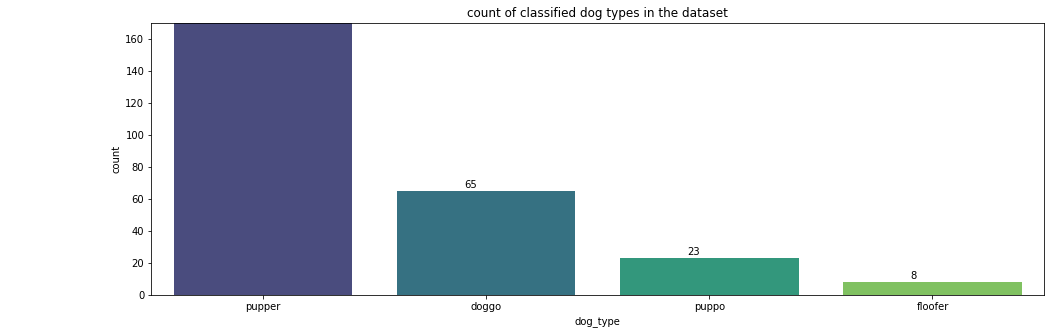

In [131]:
#https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "dog_type", data = twitter_master, order=twitter_master['dog_type'].value_counts().index, palette = "viridis")
ax.set_title("count of classified dog types in the dataset");

ax.set_ylim(0, 170)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))

The visualisation above shows the frequency of classified dog types in the dataset. Most common are puppers with over 160, then doggos - 77, followed by puppo - 25, floofer - 10.

#### 3. What is the most common breed?

In [132]:
twitter_master.breed.value_counts()

golden retriever                  154
labrador retriever                105
pembroke                           92
chihuahua                          90
pug                                60
toy poodle                         51
chow                               46
pomeranian                         42
samoyed                            42
malamute                           32
french bulldog                     31
cocker spaniel                     30
chesapeake bay retriever           30
miniature pinscher                 25
eskimo dog                         22
cardigan                           21
staffordshire bullterrier          21
siberian husky                     20
shih-tzu                           20
german shepherd                    20
beagle                             20
shetland sheepdog                  19
rottweiler                         19
lakeland terrier                   18
maltese dog                        18
italian greyhound                  17
basset      

The most common breed is golder retriever with 173 dogs.

### Visualization

The visulaisation below shows the frequency of the identified dog breeds in the dataset. The most common dogs rated are golder retriever (more than 160) followed by labrador retriver(113) and pembroke. 

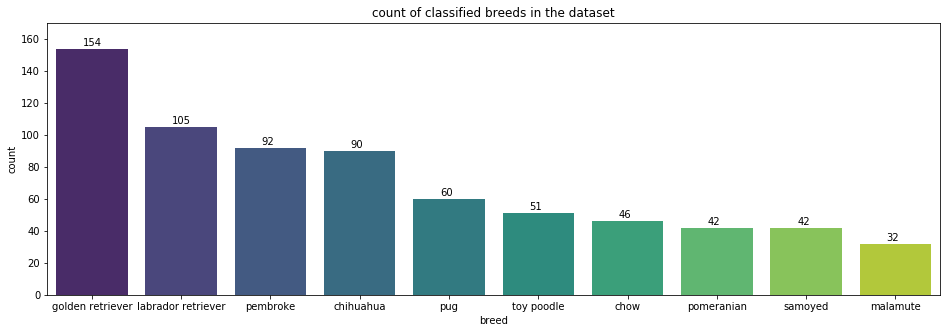

In [133]:
#https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "breed", data = twitter_master, order=twitter_master['breed'].value_counts().iloc[:10].index, palette = "viridis")
ax.set_title("count of classified breeds in the dataset");

ax.set_ylim(0, 170)
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))

### Summary and Conclusions
In this project we went through a whole data wrangling process. The gathering included the programmatical, manual download as also the gathering via an API. Also the cleaning part covered a lot of techniques like regular expressions or the overall handling of dataframes.

In this project I went through wrangling process. First I gathered the data from twitter, then assessed them visually and programmatically, identified several quality and tidiness issues and corrected them. In the end I showed a couple insighs and visualisation. 

In the analysis I examined following questions:

Questions:


**What is the highest number of retweets and which tweet is it?**
The most retweet tweet is thweet with ID 744234799360020481. Has a rating 1.3 and was retweetet 70481 times.

**What is the most common dog class?**
Most common are puppers with over 160, then doggos - 77, followed by puppo - 25, floofer - 10.

**What is the most common breed?**
The most common dogs rated are golder retriever (more than 160) followed by labrador retriver(113) and pembroke.
